In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import math
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("/train.csv", sep=',')

смотрим на данные и делаем предобработку

In [3]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
data.isna().mean()

id               0.0
comment_text     0.0
toxic            0.0
severe_toxic     0.0
obscene          0.0
threat           0.0
insult           0.0
identity_hate    0.0
dtype: float64

In [5]:
data = data.drop(['id'], axis = 1)
data = data.drop(['comment_text'], axis = 1)

In [6]:
columns_num = ['severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate']
target = ['toxic']

In [12]:
data.corr()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
toxic,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
severe_toxic,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
obscene,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
insult,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
identity_hate,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


делаем нормализацию признаков

In [19]:
from sklearn.preprocessing import StandardScaler

pca = StandardScaler()
pca.fit(data[columns_num])
data[columns_num] = pca.transform(data[columns_num])

In [20]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(data[columns_num], data[target], train_size=0.8)
lg = LogisticRegression()
lg.fit(X_train, y_train)
pred = lg.predict(X_test)
from sklearn.metrics import f1_score
print(f1_score(y_test, pred, average='macro'))

C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8604637410766092


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     28929
           1       0.92      0.62      0.74      2986

    accuracy                           0.96     31915
   macro avg       0.94      0.81      0.86     31915
weighted avg       0.96      0.96      0.96     31915



# Подбор параметров

In [22]:
from sklearn.model_selection import GridSearchCV
parameters = {'C': [0.01, 0.1, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
new_lg = LogisticRegression()
grid = GridSearchCV(new_lg, parameters, cv=5, scoring = 'f1_macro')
grid.fit(X_train, y_train)

C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anaconda3

C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anaconda3

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                               1]},
             scoring='f1_macro')

In [23]:
grid.cv_results_

{'mean_fit_time': array([0.11982903, 0.13186955, 0.14964933, 0.13857455, 0.13864222,
        0.14994183, 0.16320357, 0.14823828, 0.16592507, 0.15429792]),
 'std_fit_time': array([0.00576025, 0.01708975, 0.01621247, 0.01416973, 0.01141008,
        0.02001798, 0.01365819, 0.00936453, 0.02098225, 0.01518775]),
 'mean_score_time': array([0.01066923, 0.01049118, 0.00983744, 0.00992098, 0.00875134,
        0.01054196, 0.00935569, 0.01015167, 0.00966487, 0.01018834]),
 'std_score_time': array([0.00154876, 0.00107491, 0.00087278, 0.00132682, 0.00068181,
        0.00104274, 0.00110006, 0.00110876, 0.00111347, 0.00203885]),
 'param_C': masked_array(data=[0.01, 0.1, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.01},
  {'C': 0.1},
  {'C': 0.3},
  {'C': 0.4},
  {'C': 0.5},
  {'C': 0.6},
  {'C': 0.7},
  {'C': 0.8},
  {'C': 0.9

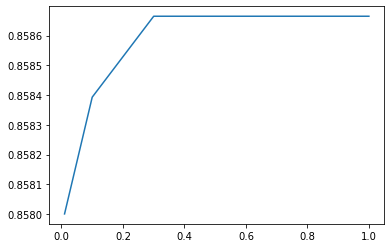

In [24]:
plt.plot(parameters['C'], grid.cv_results_['mean_test_score'])

# Собственная реализация логистической регрессии 

In [25]:
class MyLogisticRegression():
    def __init__(self, bias=True, epsilon=None):
        self.w = None
        self.bias = bias
        self.epsilon = epsilon
    
    def fit(self, X, y, max_iter=500):
        if self.epsilon == None:
            self.epsilon = 0.001
        n, k = X.shape
        
        if self.w is None:
            self.w = np.random.randn(k + 1 if self.bias == True else k)[:, np.newaxis]
        
        if self.bias == True:
            X = np.hstack((X, np.ones((n, 1))))
    
        
        for iter_num in range(max_iter):
            y_pred = self.sigmoid(np.dot(X,self.w))

            grad = self._calc_gradient(X, y, y_pred)
            self.w -= self.epsilon * grad
        

        return self

    def predict(self, X):
        n, k = X.shape
    
        if self.bias == True:
            X = np.hstack((X, np.ones((n, 1))))

        y_pred = np.dot(X,self.w)
        for i in range(len(y_pred)):
            if y_pred[i] >= 0.5:
                y_pred[i] = 1
            else:
                y_pred[i] = 0

        return y_pred
        
    def _calc_gradient(self, X, y, y_pred):
        n, k = X.shape
        grad = (1/n) * np.dot(np.transpose(X),(y_pred - y)) 
        return grad
    
    def sigmoid(self, a):
        return  1. / (1. + np.exp(-1. * a))
    
    def get_params(self, deep=True):
        return { "epsilon": self.epsilon}
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

In [26]:
MyLg = MyLogisticRegression(bias = False)
MyLg.fit(X_train, y_train)
pred = MyLg.predict(X_test)
print(f1_score(y_test, pred, average='macro'))

0.8595280128046259


In [27]:
from sklearn.model_selection import GridSearchCV
parameters = {'epsilon': np.geomspace(0.0001, 1, num=13)}
grid = GridSearchCV(MyLogisticRegression(), parameters, cv=5, scoring = 'f1_macro')
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=<__main__.MyLogisticRegression object at 0x000001161CDF1B80>,
             param_grid={'epsilon': array([1.00000000e-04, 2.15443469e-04, 4.64158883e-04, 1.00000000e-03,
       2.15443469e-03, 4.64158883e-03, 1.00000000e-02, 2.15443469e-02,
       4.64158883e-02, 1.00000000e-01, 2.15443469e-01, 4.64158883e-01,
       1.00000000e+00])},
             scoring='f1_macro')

In [29]:
grid.cv_results_

{'mean_fit_time': array([1.76523795, 1.67148633, 1.7071054 , 1.89037046, 2.26322117,
        1.94351101, 1.86217494, 1.80868731, 1.77351699, 1.71277633,
        1.7180759 , 1.70532546, 1.54638329]),
 'std_fit_time': array([0.11470535, 0.01614391, 0.05954436, 0.25964886, 0.29436821,
        0.19437777, 0.1231608 , 0.10733605, 0.16702641, 0.09210966,
        0.1617566 , 0.12662092, 0.00847763]),
 'mean_score_time': array([0.06271696, 0.0562706 , 0.05985699, 0.08129492, 0.0753376 ,
        0.07002039, 0.05836067, 0.06626015, 0.06067233, 0.06103239,
        0.05950675, 0.05688968, 0.0516232 ]),
 'std_score_time': array([0.00968394, 0.00292137, 0.0052262 , 0.02365554, 0.01100292,
        0.00867814, 0.00530667, 0.01096713, 0.00643749, 0.00469578,
        0.00540926, 0.00574904, 0.00158144]),
 'param_epsilon': masked_array(data=[0.0001, 0.00021544346900318845, 0.00046415888336127773,
                    0.001, 0.002154434690031882, 0.004641588833612777,
                    0.01, 0.0215443469

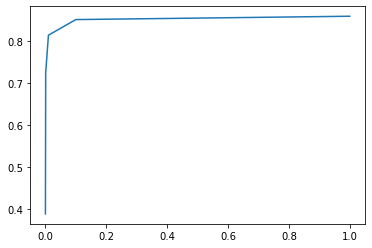

In [30]:
plt.plot([0.0001, 0.001, 0.01, 0.1, 1], grid.cv_results_['mean_test_score'][0:13:3])

# SGDClassifier

In [31]:
from sklearn.linear_model import SGDClassifier
Classifier_SGD = SGDClassifier(loss='log')
Classifier_SGD.fit(X_train, y_train)
pred = Classifier_SGD.predict(X_test)
print(f1_score(y_test, pred, average='macro'))

C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8629581511113369
